In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data_flight = pd.read_csv("Clean_Dataset.csv")
# remove the first column
data_flight = data_flight.drop(data_flight.columns[0], axis=1)
data_flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Basic information of the dataset

In [66]:
# check the basic information of the numeric data in dataset
data_flight.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [67]:
# check the tpye of the columns and the null value
data_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [68]:
# check unique value in each feature
columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']

for column in columns:
    print(f'{column}:', data_flight[column].unique())

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
class: ['Economy' 'Business']


By data visualization, it is obvious that ticket price varies among the airlines.

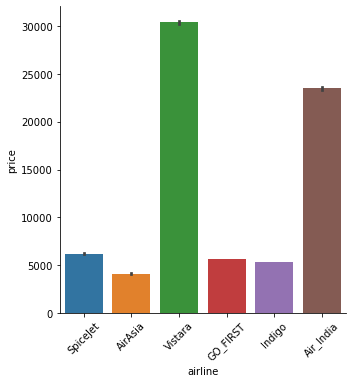

In [69]:
# plot airline vs ticket price
sns.catplot(x='airline', y='price', data=data_flight, kind='bar')
plt.xticks(rotation=45)
plt.show()

Also, price range in a big difference between economy and business class.

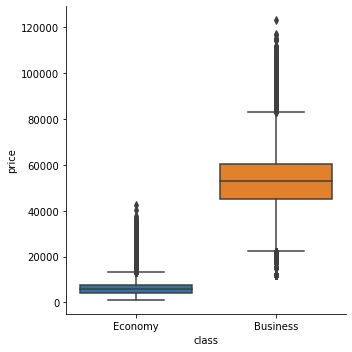

In [70]:
# plot class vs ticket price
sns.catplot(x='class', y='price', data=data_flight, kind='box')
plt.show()

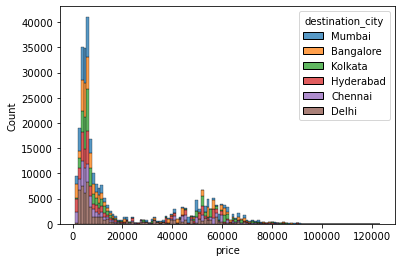

In [71]:
# plot price in different destination city
sns.histplot(data_flight, x='price', hue='destination_city', multiple='stack')
plt.show()

How ticket price changes depending on the days before departure ?

In [80]:
days_price_mean = data_flight.groupby('days_left')['price'].mean()

Text(0, 0.5, 'Avg Price')

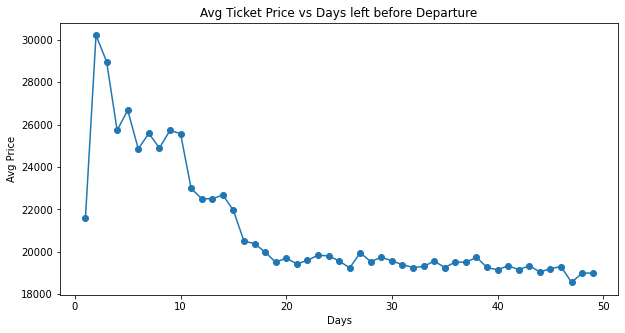

In [81]:
plt.figure(figsize=(10,5))
plt.plot(days_price_mean.index, days_price_mean.values, 'o-')
plt.title('Avg Ticket Price vs Days left before Departure')
plt.xlabel('Days')
plt.ylabel('Avg Price')

# Feature Engineering

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

Only 'duration','days_left','price' are numeric data we have to process the original variables and turn them into features that fits the model.First, simply encode 'stops' and 'class' into numeric features by replace the category to numbers.Second, use pd.get_dummies to get features of different categories.Third, drop the useless variable 'flight' in the origin dataset.

In [73]:
def preprocessing(data):
    # Encode the ordinal variables "stops" and "class"
    data["stops"] = data["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    data["class"] = data["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    # Create the dummy variables for category variables(including the cities, the times and the airlines)
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(data, columns = dummies_variables, drop_first= True)
    
    # drop the flight column(useless in build the model)
    dummies = dummies.drop('flight',axis=1)
    
    return dummies

In [74]:
data_preprocessed = preprocessing(data_flight)
# show the processed features
data_preprocessed.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


# Build the model using the default parameters

In [75]:
# split features and target label
X = data_preprocessed.drop('price', axis=1)
y = data_preprocessed['price']

# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

# train the linear regression model
lr_model.fit(X_train, y_train)

# make predictions
predictions = lr_model.predict(X_test)

In [76]:
# Calculate the R-squared score on the training data
r_squared = lr_model.score(X, y)
print(f"R-squared score: {r_squared}")

R-squared score: 0.9099791522669496


# Trying to find a better model by searching the best parameters

In [77]:
# Define the parameter grid for optimization
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

# Using GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Rebuild the model with the best parameters
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

# Make prediction
predictions = best_model.predict(X_test)

# Evaluate the model
print(f'Best parameters: {best_params}')
r_squared = lr_model.score(X_test, y_test)
print(f"R-squared score: {r_squared}")

d:\ProgrammingTools\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
d:\ProgrammingTools\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline


Best parameters: {'fit_intercept': True, 'normalize': True}
R-squared score: 0.9099031138535913
